In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, \
    classification_report

In [2]:
#download the dataset freom https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes/data

# Load the dataset
file_path = 'C:/Users/nn/Downloads/Healthcare-Diabetes.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

print("Overall information of dataset:")
print(df.info())

# Check for missing values
print("\nSummary of missing values:")
print(df.isnull().sum())

# Basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(df.describe())

First few rows of the dataset:
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Overall information of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  

In [7]:
# Drop the ID column
df = df.drop(columns=['Id'])

# statistical outlier detection
# Calculate Z-scores for all numerical columns
z_scores = stats.zscore(df.select_dtypes(include=[np.number]))

# Convert to DataFrame for easy manipulation
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)

# Define a threshold to identify outliers (commonly used threshold is 3)
threshold = 3

# Identify outliers
outliers = (np.abs(z_scores_df) > threshold).any(axis=1)
outliers_df = df[outliers]

print(f'Number of outliers detected: {outliers.sum()}')
print('Outliers:')
print(outliers_df)

Number of outliers detected: 291
Outliers:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4               0      137             40             35      168  43.1   
7              10      115              0              0        0  35.3   
8               2      197             70             45      543  30.5   
9               8      125             96              0        0   0.0   
13              1      189             60             23      846  30.1   
...           ...      ...            ...            ...      ...   ...   
2734            0      102             75             23        0   0.0   
2742            1      153             82             42      485  40.6   
2748           17      163             72             41      114  40.9   
2761            2       87              0             23        0  28.9   
2766            0      129            110             46      130  67.1   

      DiabetesPedigreeFunction  Age  Outcome  
4        

C:\Users\nn\AppData\Local\Temp\ipykernel_17220\4071732432.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True, ax=ax)
C:\Users\nn\AppData\Local\Temp\ipykernel_17220\4071732432.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True, ax=ax)
C:\Users\nn\AppData\Local\Temp\ipykernel_17220\4071732432.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True, ax=ax)
C:\Users\nn\AppData\Local\Temp\ipykernel_17220\4071732432.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; plea

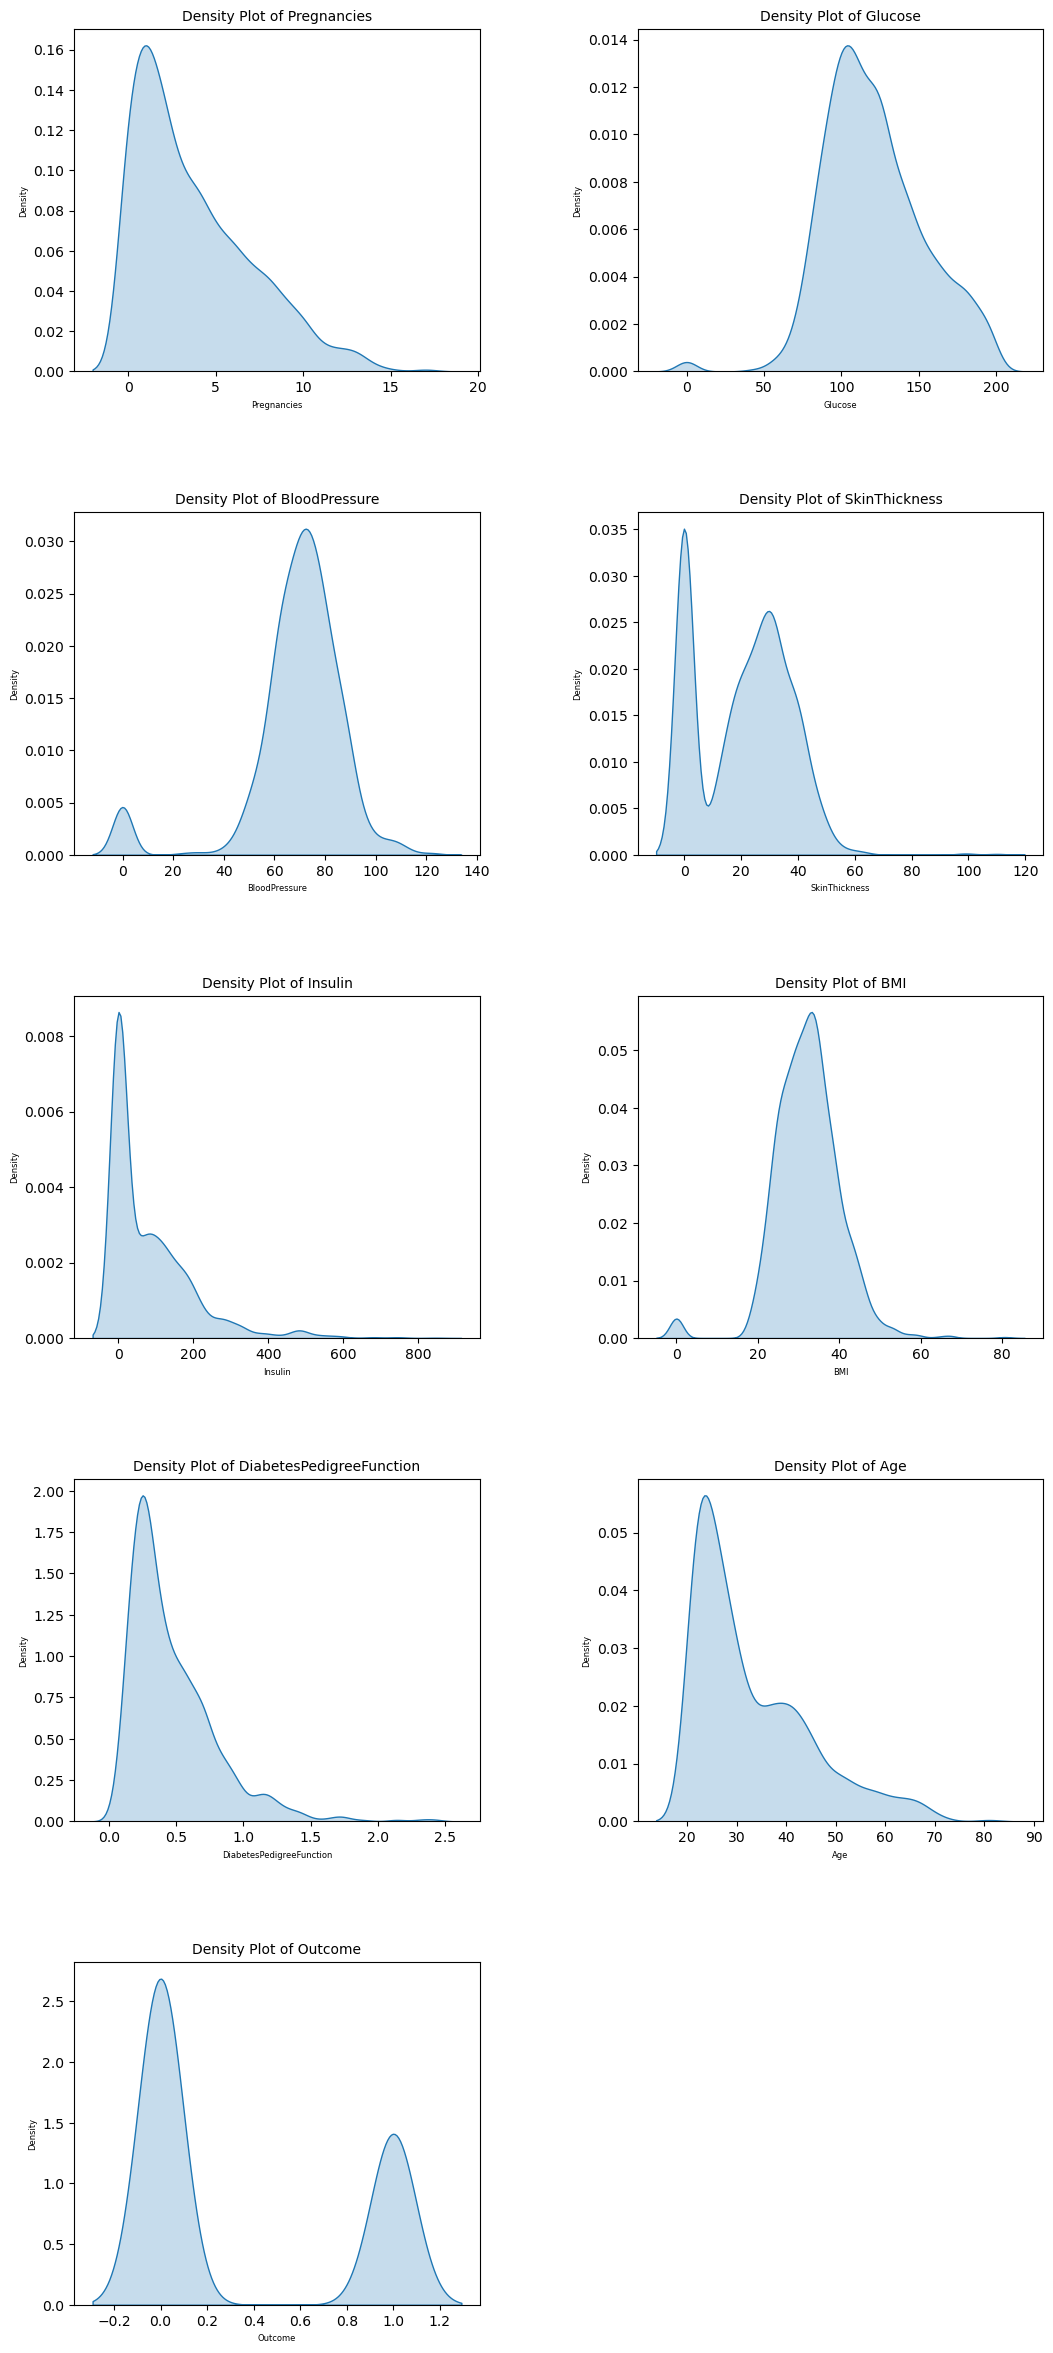

In [9]:
# density plot of individual features
# Extract numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns

# Set the number of rows and columns for the subplots
n_rows = (len(numerical_features) + 1) // 2  # 2 columns

fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 5))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    sns.kdeplot(df[feature], shade=True, ax=ax)
    ax.set_title(f'Density Plot of {feature}', fontsize=10)
    ax.set_xlabel(feature, fontsize=6)
    ax.set_ylabel('Density', fontsize=6)

# Remove any empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(pad=6.0)  # Adjust spacing
plt.show()

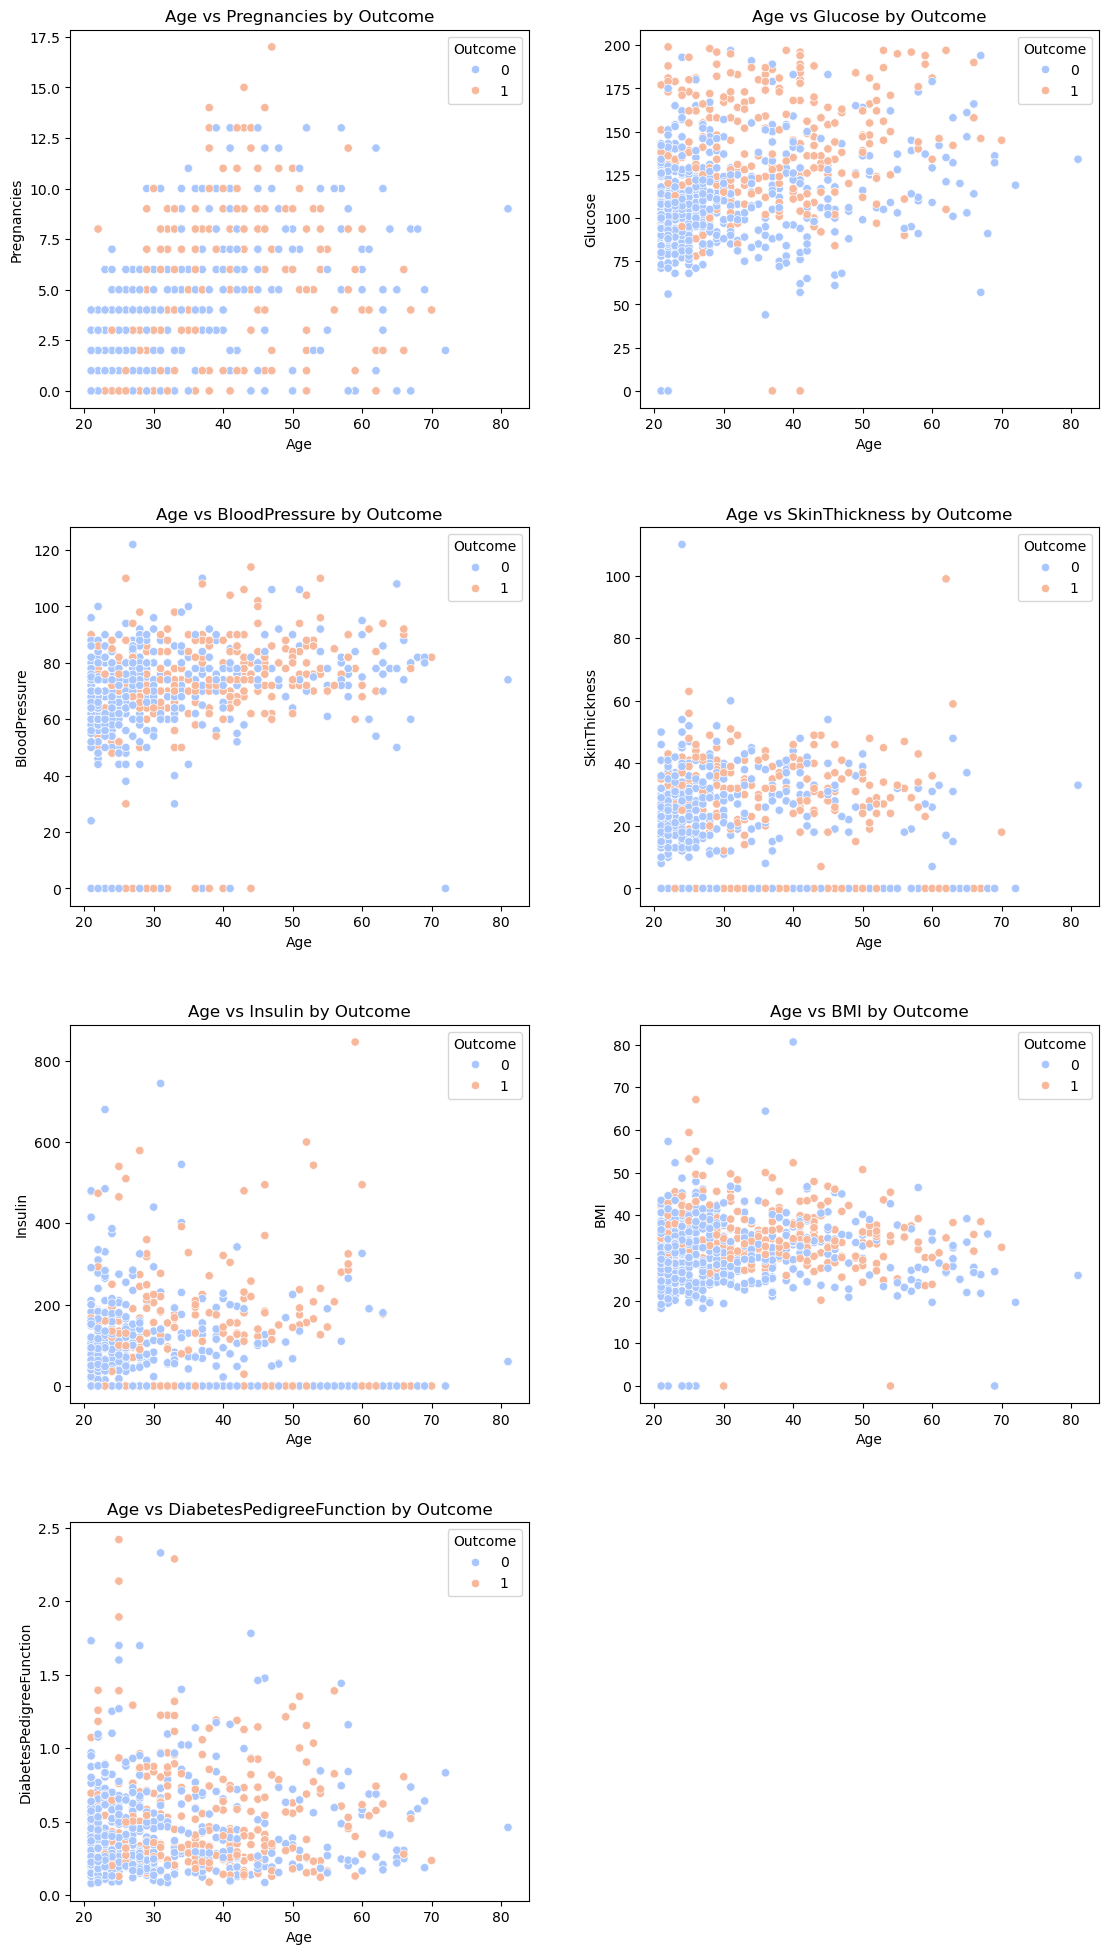

In [11]:
#scatterplot of features vs age and outcome
# Extract relevant columns
x_column = 'Age'
outcome_column = 'Outcome'
numerical_features = df.select_dtypes(include=[np.number]).columns.drop([x_column, outcome_column])

# Set the number of rows and columns for the subplots
# n_rows = (len(numerical_features) + 1) // 2  # 2 columns

fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 5))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    sns.scatterplot(data=df, x=x_column, y=feature, hue=outcome_column, palette='coolwarm', ax=ax)
    ax.set_title(f'{x_column} vs {feature} by {outcome_column}', fontsize=12)
    ax.set_xlabel(x_column, fontsize=10)
    ax.set_ylabel(feature, fontsize=10)

# Remove any empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(pad=4.0)  # Adjust spacing
plt.show()

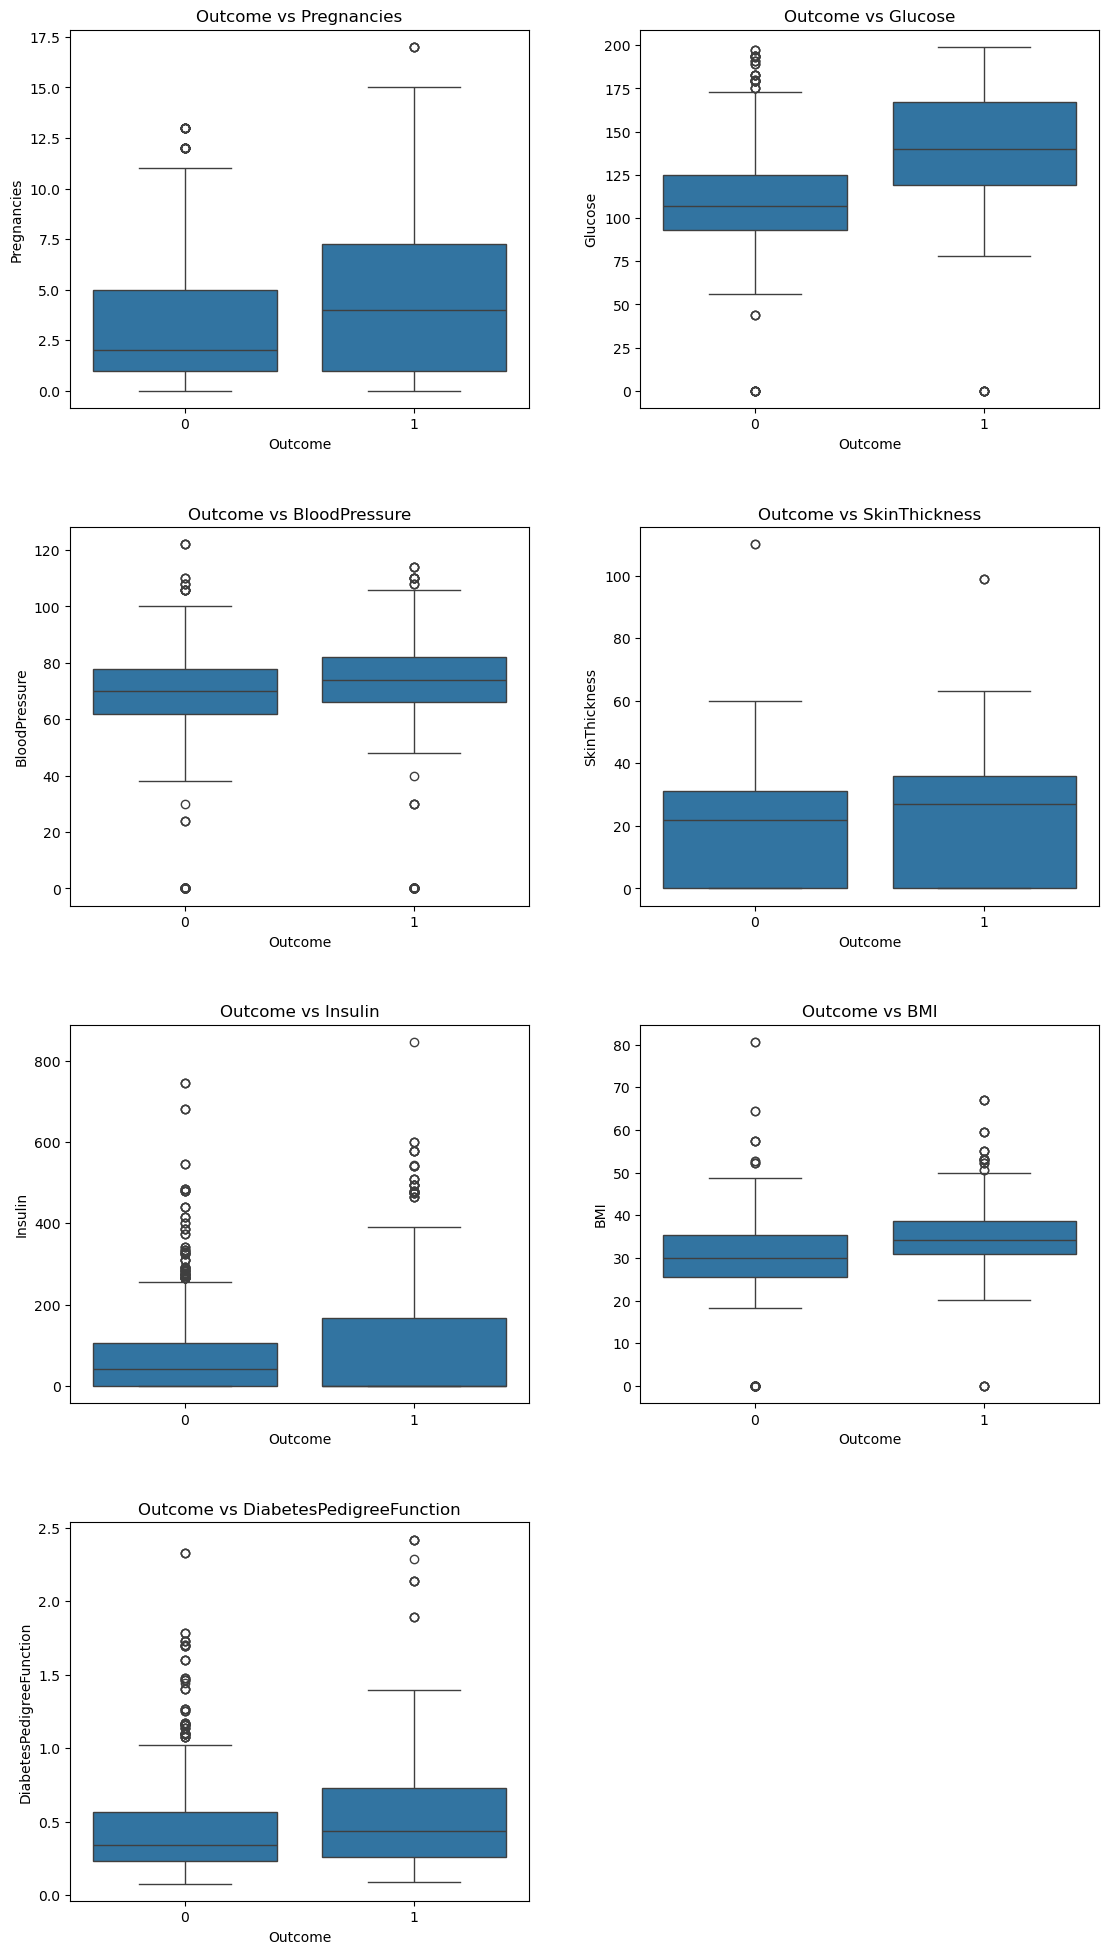

In [13]:
# Create box plots
fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    sns.boxplot(data=df, x=outcome_column, y=feature, ax=ax)
    ax.set_title(f'{outcome_column} vs {feature}', fontsize=12)
    ax.set_xlabel(outcome_column, fontsize=10)
    ax.set_ylabel(feature, fontsize=10)

# Remove any empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(pad=4.0)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

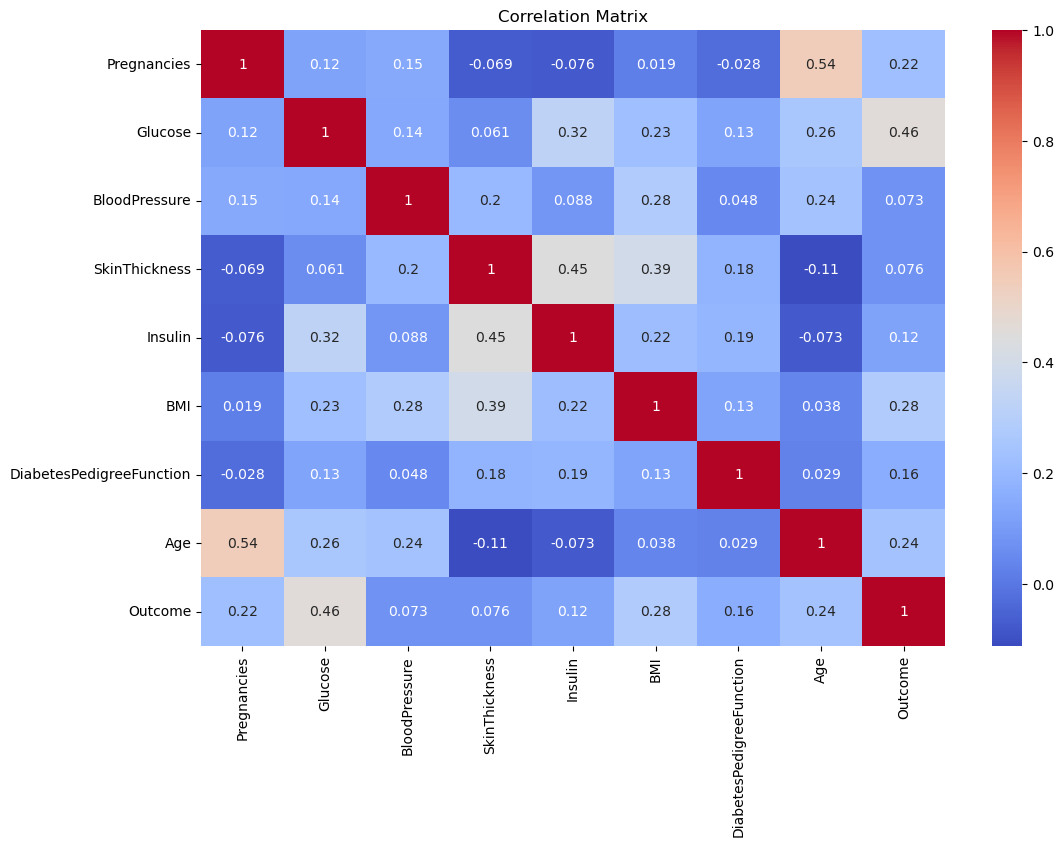

In [15]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
# plt.show()

In [17]:
# Select only the specified features from the dataframe
selected_features = ['Pregnancies', 'Glucose', 'BMI', 'Age']
X = df[selected_features]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Dictionary to store performance metrics
performance_metrics = {}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC Score': roc_auc_score(y_test, y_pred)
    }
    performance_metrics[model_name] = metrics

    # Print classification report
    print(f'Classification Report for {model_name}:\n')
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       562
           1       0.71      0.55      0.62       269

    accuracy                           0.78       831
   macro avg       0.76      0.72      0.73       831
weighted avg       0.78      0.78      0.77       831

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       562
           1       0.96      0.96      0.96       269

    accuracy                           0.97       831
   macro avg       0.97      0.97      0.97       831
weighted avg       0.97      0.97      0.97       831

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       562
           1       0.96      0.96      0.96       269

    accuracy                           0.97       

                     Accuracy  Precision    Recall  F1 Score  ROC AUC Score
Logistic Regression  0.782190   0.713592  0.546468  0.618947       0.720743
Decision Tree        0.974729   0.962687  0.959108  0.960894       0.970657
Random Forest        0.973526   0.962547  0.955390  0.958955       0.968798


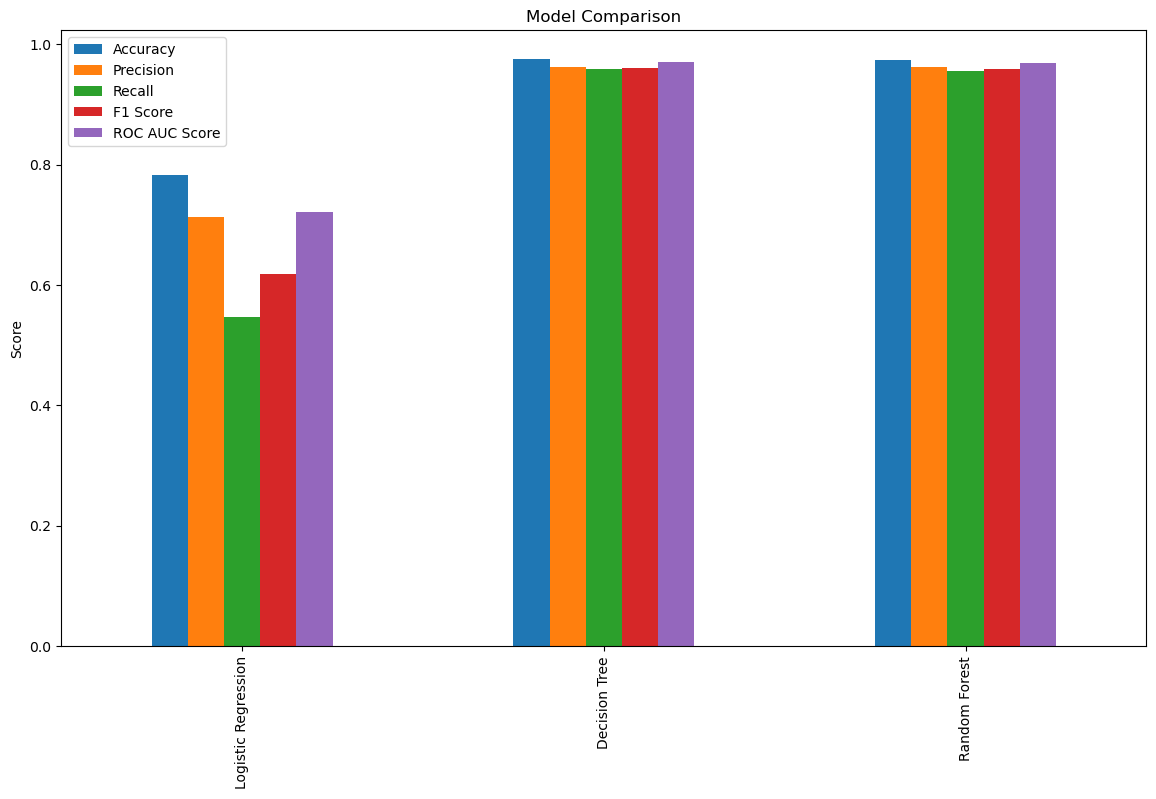

In [21]:
# Convert performance metrics to DataFrame for easier comparison
metrics_df = pd.DataFrame(performance_metrics).T
print(metrics_df)

# Plot performance metrics
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.show()